### ConnectTel will benefit from this solution by having a robust customer churn prediction system. This system will help them accurately forecast customer churn, allowing them to implement targeted retention initiatives. By reducing customer attrition and enhancing customer loyalty, ConnectTel can maintain a competitive edge in the telecommunications industry and ensure business sustainability and growth.

In [1]:
#for Data Analysis
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter # counting

#for Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# for Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Classifiers( M.L Algorithms)

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
 
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load Data
churn_df= pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE FILES\Capstone Project\Customer-Churn.csv")

In [3]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Replace the non-numeric  values to NaN
churn_df["TotalCharges"] = churn_df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [6]:
churn_df.drop("customerID", axis=1,inplace=True)

In [7]:
# Change the totalcharges data type from object to float
churn_df["TotalCharges"]= churn_df["TotalCharges"].astype(float)


In [8]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
churn_df.describe(include=['object','bool'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [10]:
# Examine the columns/
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
churn_df.duplicated().sum()

22

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


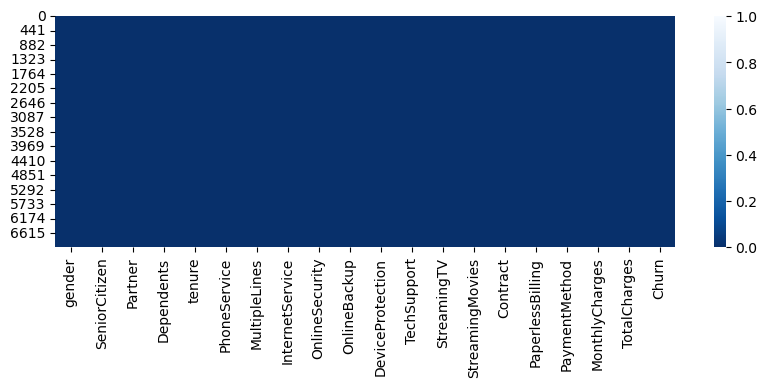

In [12]:
#check for missing data
print(churn_df.isnull().sum())

#visualize missing data
plt.figure(figsize =(10,3))
sns.heatmap(churn_df.isnull(), cbar=True, cmap= "Blues_r");

### Univariate

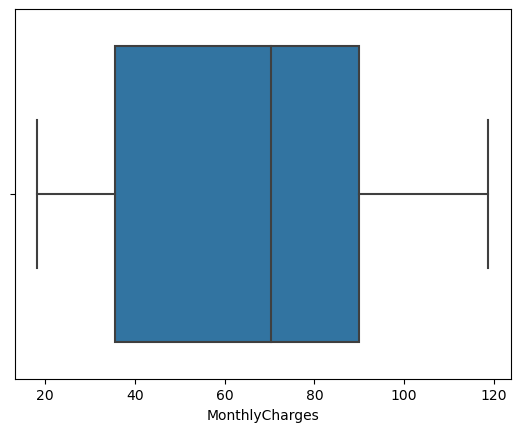

In [13]:
#Univariate Analysis
#check for outliers
sns.boxplot(x=churn_df["MonthlyCharges"]);

#### Observtions
 1)There are no Outliers
 
 2)The median(Q2) falls around the 70 mark which is at the 

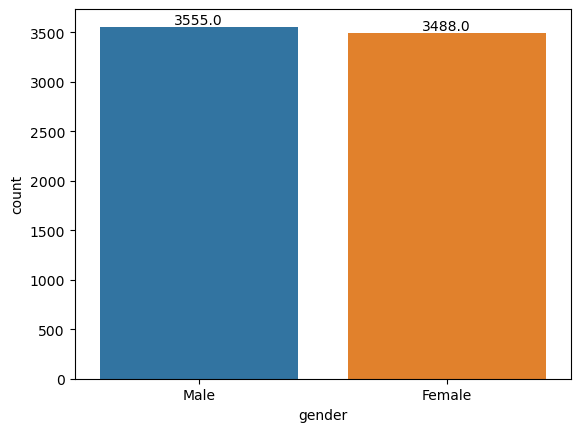

In [14]:
#Count of Gender
order =churn_df['gender'].value_counts(ascending=False).index
ax = sns.countplot(x="gender", data=churn_df, order=order)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


### Observations

There are 3555 Males against 3488 Females who patronize the company

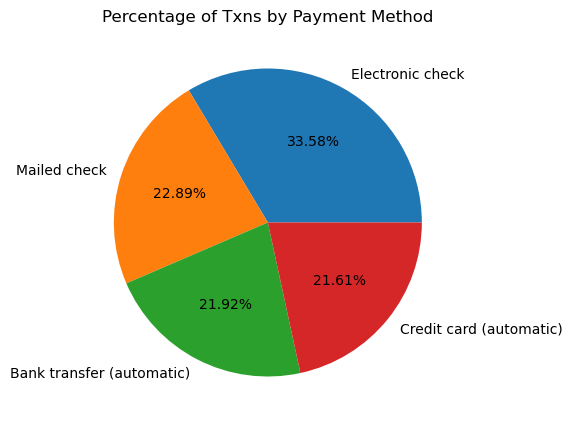

In [15]:
#Total txn by Payment Method using piechart

fig,ax= plt.subplots(figsize=(5,5))
count= Counter(churn_df["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Txns by Payment Method")
plt.show()

#### Observations

The most used payment method is Electronic Check and the least used is Credit Card

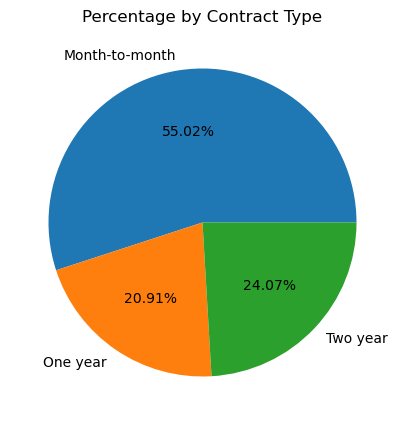

In [16]:
#Total txn by Contract using piechart

fig,ax= plt.subplots(figsize=(5,5))
count= Counter(churn_df["Contract"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage by Contract Type")
plt.show()

#### Observations

Most of the customers are subscribed to a Month to Month contract with 55.02%, followed by Two year contract type having 24.07% and the least contract type is the One Year with 20.91%

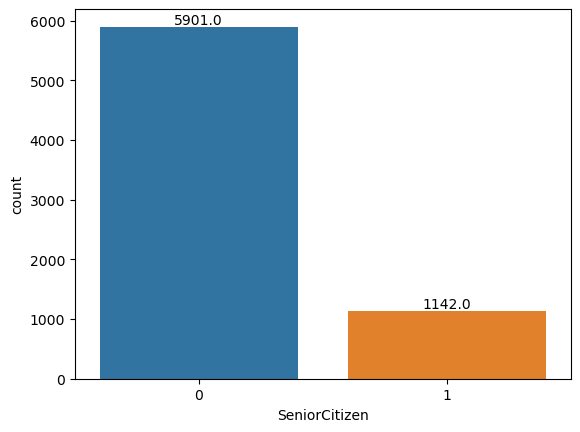

In [17]:
#Count of Senior Citizen
order =churn_df['SeniorCitizen'].value_counts(ascending=False).index
ax = sns.countplot(x="SeniorCitizen", data=churn_df, order=order)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


#### Observations
There are 1142 Senior Citizens Patronizing the Company

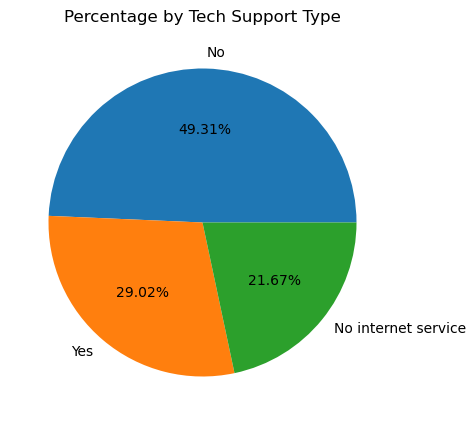

In [18]:
#Percentage by TechSupport using piechart

fig,ax= plt.subplots(figsize=(5,5))
count= Counter(churn_df["TechSupport"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage by Tech Support Type")
plt.show()

#### Observations

There are 49.31% of customers who do not have Tech Support Services while 29.02% have Tech support services. 21.67% are offline(Do not have any Internet Services)

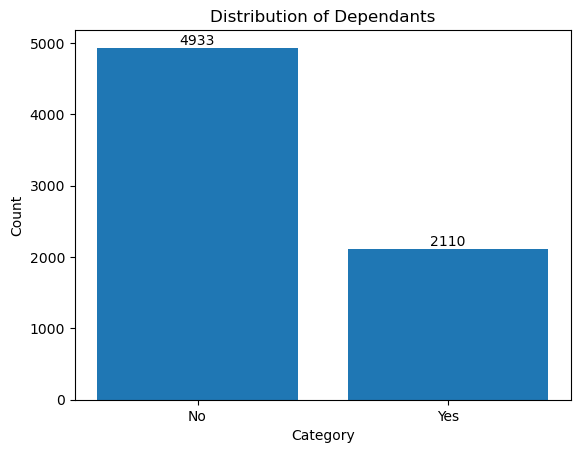

In [19]:
# Count of Dependents
plt.bar(churn_df['Dependents'].value_counts().index, churn_df['Dependents'].value_counts().values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Dependants')

for i, count in enumerate(churn_df['Dependents'].value_counts().values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

#### Observations

There are 4933 customers who do not have Dependants while 2110 customers have Dependants

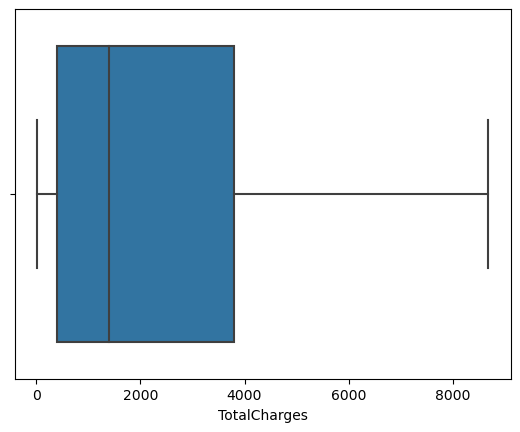

In [20]:
#check for outliers
sns.boxplot(x=churn_df["TotalCharges"]);

 #### observation
 The median is closer to the lower quartile. And there are no outliers

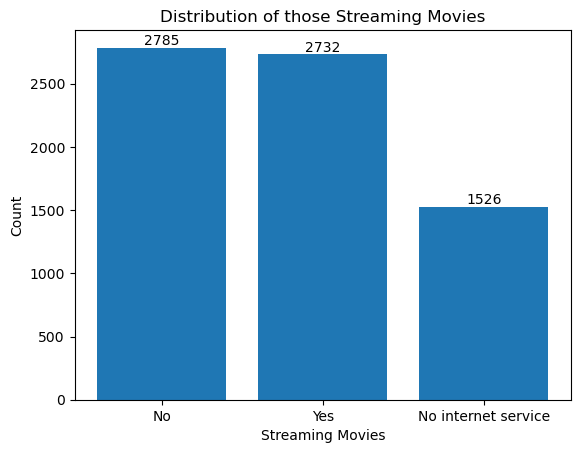

In [21]:
#Count of those Streaming Movies
plt.bar(churn_df['StreamingMovies'].value_counts().index, churn_df['StreamingMovies'].value_counts().values)
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.title('Distribution of those Streaming Movies')

for i, count in enumerate(churn_df['StreamingMovies'].value_counts().values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

#### Observations


There are 2785 people who do no stream movies online, against 2732 people who do, while 1526 do not have internet service atall

### Bivariate Analysis

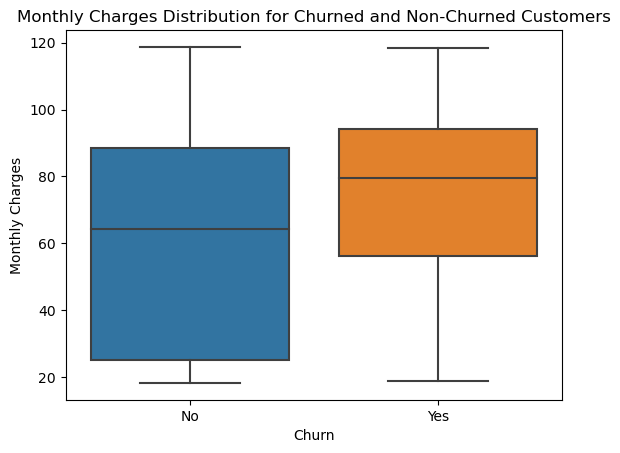

In [22]:
# Create a box plot to visualize the distribution of monthly charges for churned and non-churned customers
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution for Churned and Non-Churned Customers')
plt.show()


### Observation
The median Value for the customers who have churned is higher, which indicates that they have higher monthly charges compared to that of those who has not churned

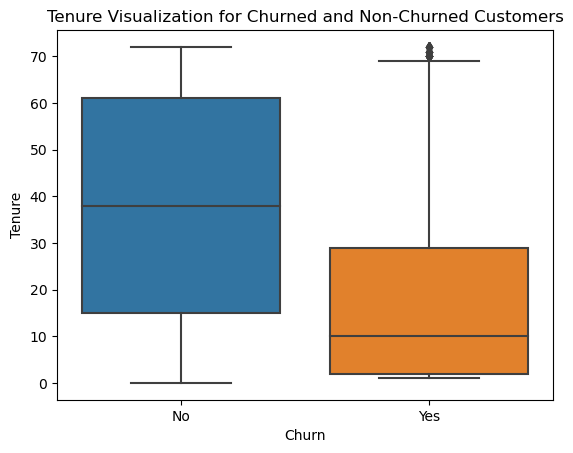

In [23]:
# Create a box plot to visualize the distribution of Tenure for churned and non-churned customers
sns.boxplot(x='Churn', y='tenure', data=churn_df)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure Visualization for Churned and Non-Churned Customers')
plt.show()


#### Observation
We can notice that there are some outliers, meaning there are customers who had a relatively short stay before churning. So we need to investigate factors that caused that.


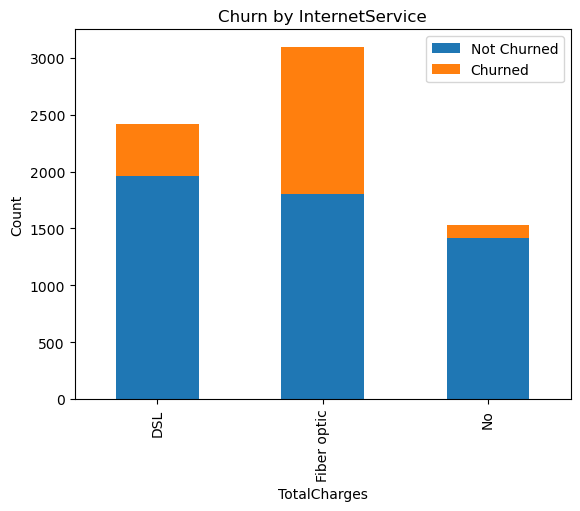

In [24]:
# Count the number of churned and non-churned customers for each category
churn_counts = churn_df.groupby('InternetService')['Churn'].value_counts().unstack()
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.title('Churn by InternetService')
plt.legend(['Not Churned', 'Churned'])
plt.show()

Generally there are more customers using internet Services who has not churned

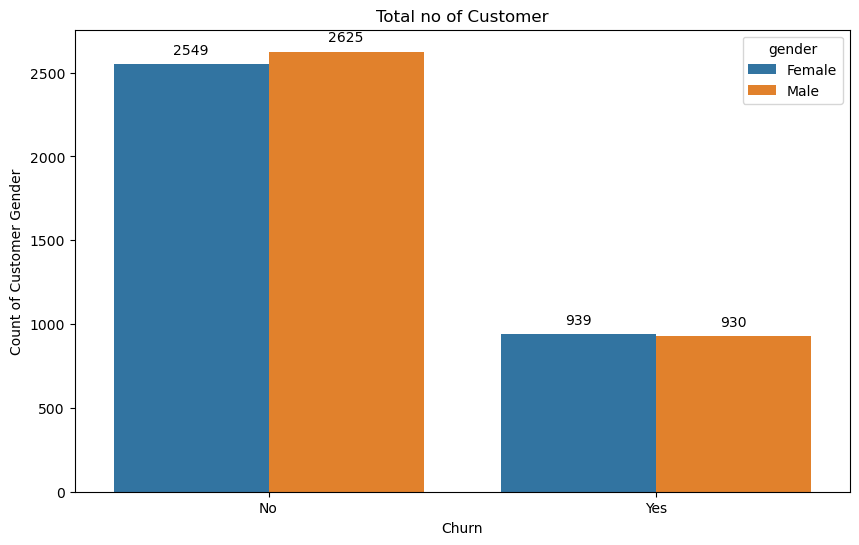

In [25]:
# Analyzing Customer Gender and Churn
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Churn", data=churn_df, hue="gender")

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("Churn")
plt.ylabel("Count of Customer Gender")
plt.title("Total no of Customer");

#### Observations

There are more Females who canceled there service. There are More Males who have not Churned

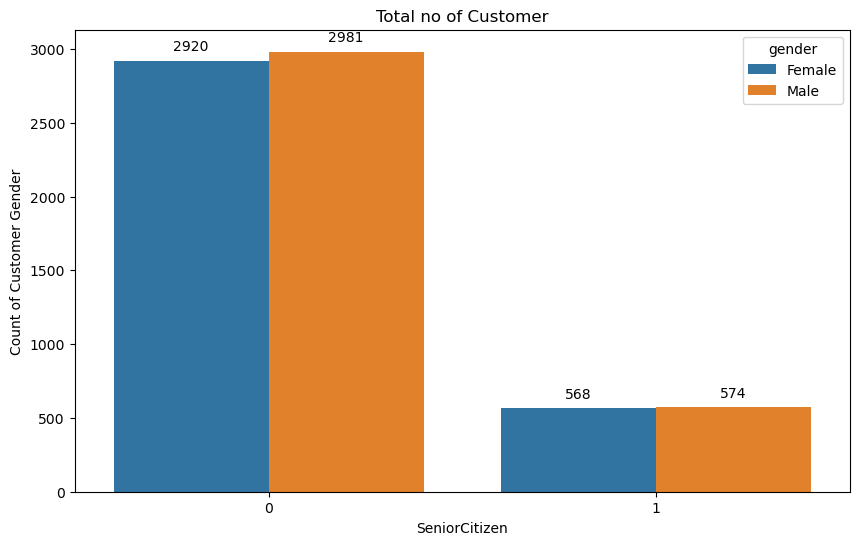

In [26]:
# Analyzing Customer Gender and Senior Citizen
plt.figure(figsize=(10,6))
ax = sns.countplot(x="SeniorCitizen", data=churn_df, hue="gender")

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("SeniorCitizen")
plt.ylabel("Count of Customer Gender")
plt.title("Total no of Customer");

#### Observations

There are more Males who are not senior Citizens and also more Males who are  Senior Citizens

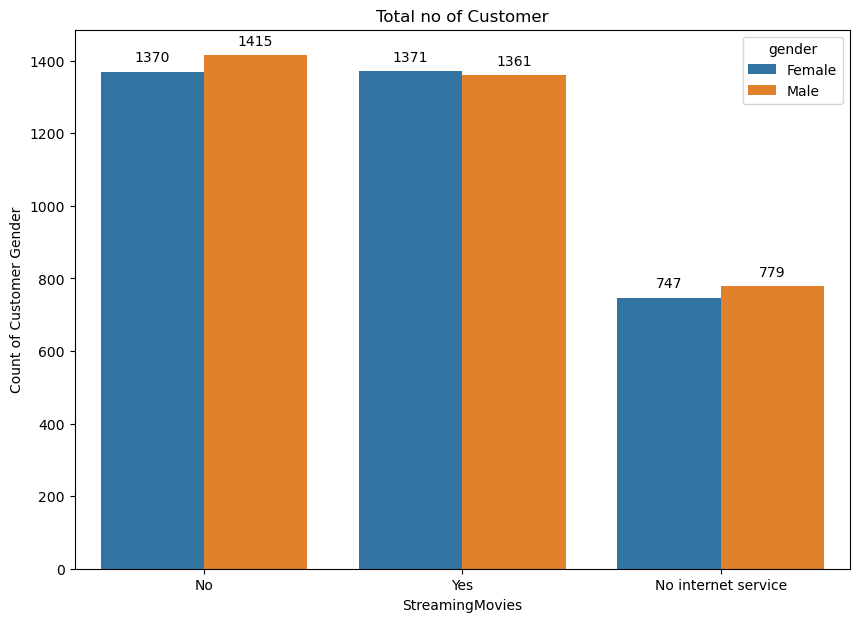

In [27]:
# Analyzing Customer Gender and those streaming movies
plt.figure(figsize=(10,7))
ax = sns.countplot(x="StreamingMovies", data=churn_df, hue="gender")

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("StreamingMovies")
plt.ylabel("Count of Customer Gender")
plt.title("Total no of Customer");

#### Observations

There are more Males to Females who do not stream movies online. There are more Females who do stream Movies onlines, 779 males do not have Internet Services, While 747 females do not have Internet Service.

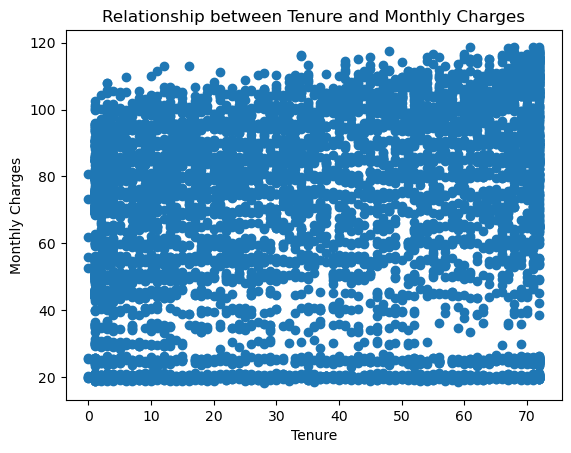

In [28]:
# Analyzing tenure and Monthly Charges
plt.scatter(churn_df['tenure'], churn_df['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Tenure and Monthly Charges')
plt.show()


#### Observations

There is a Positive Correlation between Tenure and MonthlyCharges. As the Tenure increases, the Monthly charges also increases.

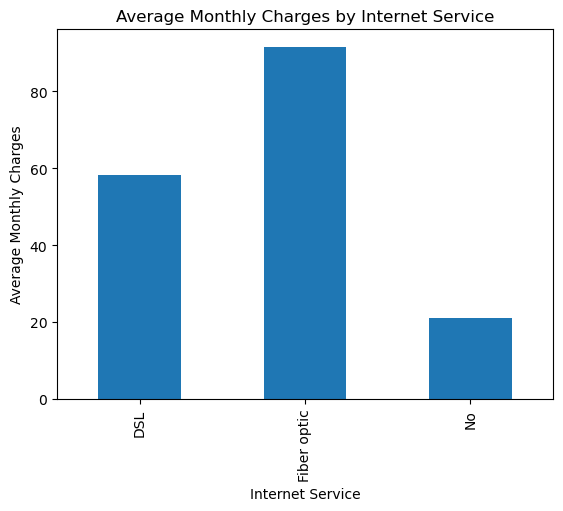

In [29]:
# Analyzing monthly charges and Internet Service
average_charges = churn_df.groupby('InternetService')['MonthlyCharges'].mean()

# Plot the average charges for each Internet Service category
average_charges.plot(kind='bar')
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Internet Service')
plt.show()

#### Observations

Customers using Fiber Optics are charged more monthly followed by customers using DSL.

In [30]:
# Examine the columns/
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Multivariate Analysis

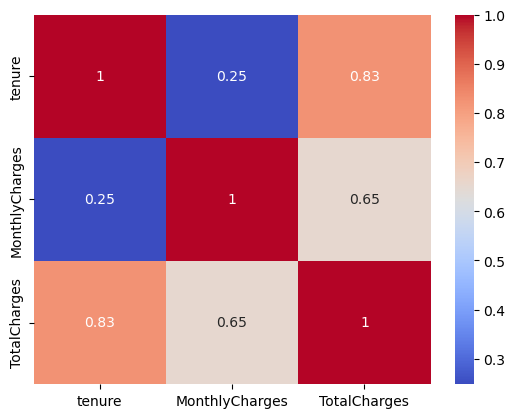

In [31]:
a= ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation_matrix = churn_df[a].corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.show()

#### Observation

This heat map shows there is a  very high correlation between Tenure and Total Charges and  also Monthly Charges has a high positive Correlation with Total Charges. In all they all have a positive correlation with eachother.

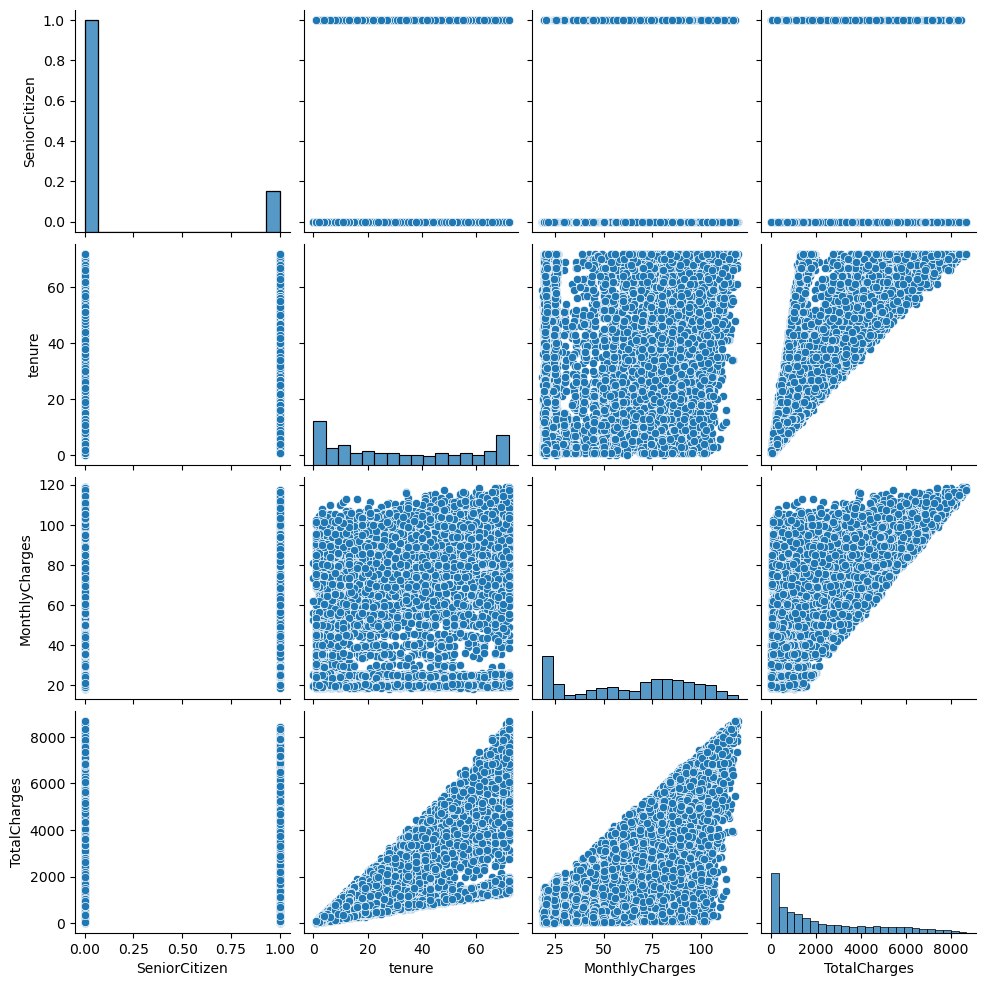

In [32]:
sns.pairplot(churn_df,size=2.5);

### Data Preprocessing/ Feature Engineering

In [33]:
churn_df3=churn_df.copy()

In [34]:
# Fill the missing values in Total Charges using mean

mean_total_charges = churn_df3['TotalCharges'].mean()

# Fill the missing values with the mean
churn_df3['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [35]:
churn_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
# Perform one-hot encoding on the columns
encoded_df = pd.get_dummies(churn_df3,drop_first=True)

In [37]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


In [38]:
#segment dataset into data and target label
y = encoded_df.pop('Churn_Yes')

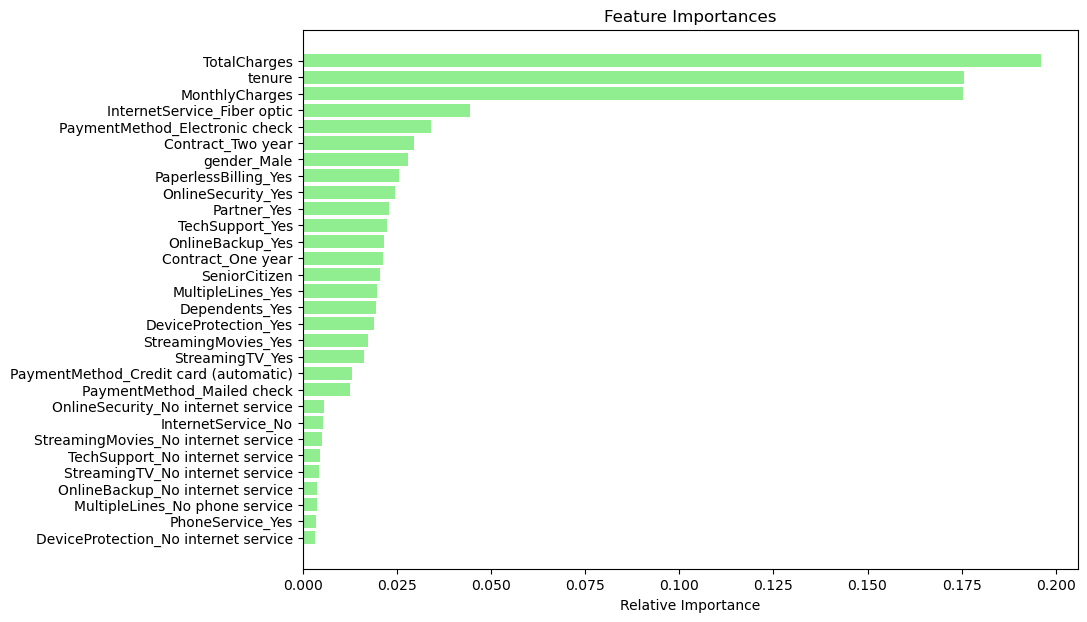

In [39]:
# scale dataset features
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#identifying key featurs from the data set
#plotting a feature importance chart
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(encoded_df,y),columns=encoded_df.columns)

#weill use a random classifier model to identify the importance features
model = RandomForestClassifier()
# fit the model
model.fit(df_scaled, y)
feature_names = list(encoded_df.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In this code above , a new DataFrame called `df_scaled` is created. It uses the `scaler.fit_transform()` function to scale the values in the `encoded_df` DataFrame and the target variable `y`. The resulting scaled values are then assigned to the columns of `df_scaled`, which are the same as the columns in `encoded_df`. This code is useful for scaling the features and target variable in a dataset for machine learning purposes.

### Logistic Regression Model

In [40]:
# split the DataFrame into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, train_size=0.7,random_state=1)

In [41]:
# BUILDING A BASE MODEL
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train) # Train

LogisticRegression()

In [42]:
#creating a prediction file
log_pred = log_clf.predict(x_test) # Predict

# Model Evaluation
print("Logistic Regression")
print ("Accuracy:", accuracy_score(y_test, log_pred))
print ("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.8088026502602934
Precision: 0.6270491803278688
Recall: 0.5795454545454546
F1-score: 0.6023622047244095
AUC-ROC: 0.7323594780613708


### Observation

After Evaluating the performance of the logistic regression model Accuracy has the highest and more accurate prediction

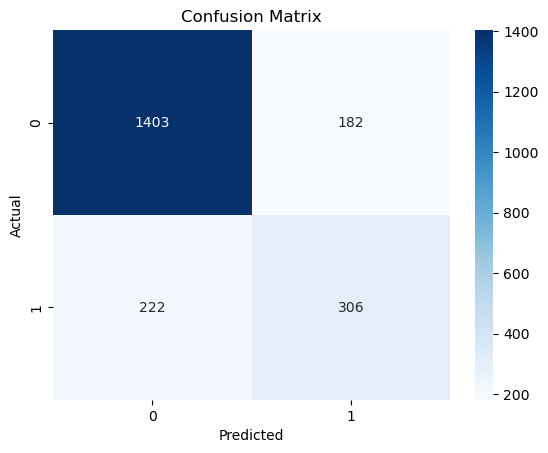

In [43]:
# creste the confusion Matrix

lcm=confusion_matrix(y_test, log_pred)


#Visualize the confusion_marix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

#### Observations
- True Positives (TP): You have 306 true positives, which means that the model correctly predicted 306 instances as positive.
- False Positives (FP): There are 182 false positives, indicating that the model incorrectly predicted 182 instances as positive when they were actually negative.
- False Negatives (FN): There are 222 false negatives, indicating that the model incorrectly predicted 222 instances as negative when they were actually positive.
- True Negatives (TN): You have 1403 true negatives, which means that the model correctly predicted 1403 instances as negative.



#### Note
- **We will compute the model's r_squared score (r2_score) which is a measure of how "good afit" the linear model is for modelling this kind of data**
- **Here we will use business metrics such as the mean squared error(mse) and the root mean squared error (rsme) model Evaluation**

In [44]:
#Calculate mean squared error
mse = np.logical_xor(y_test, log_pred).mean()

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = np.logical_xor(y_test, log_pred).sum() / len(y_test)

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.1911973497397066
MSE: 0.1911973497397066
RMSE: 0.4372611916689001


Based on the R2 value of 0.191, it indicates that the model explains about 19.1% of the variance in the data. The MSE value of 0.191 and the RMSE value of 0.437 suggest that the model has some room for improvement. Keep in mind that the closer R2 is to 1 and the lower MSE and RMSE values are, the better the model fits the data.

### Random Forest Model

In [45]:
# Model Building
#Random Forest
rfc= RandomForestClassifier()

rfc.fit(x_train, y_train)



RandomForestClassifier()

In [46]:
#creating a prediction file
rfy_pred = rfc.predict(x_test)

print("Random Forest")
print ("Accuracy:", accuracy_score(y_test, rfy_pred))
print ("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.7998106956933271
Precision: 0.6109936575052854
Recall: 0.5473484848484849
F1-score: 0.5774225774225774
AUC-ROC: 0.7156300783863875


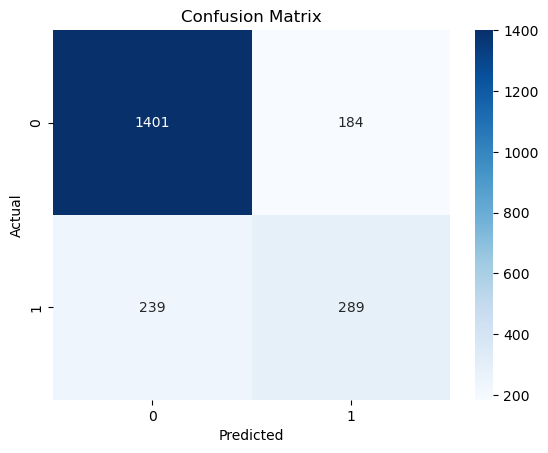

In [47]:
# creste the confusion Matrix

lc=confusion_matrix(y_test, rfy_pred)


#Visualize the confusion_marix

sns.heatmap(lc, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

#### Observations
- True Positives (TP): You have 289 true positives, which means that the model correctly predicted 289 instances as positive.
- False Positives (FP): There are 184 false positives, indicating that the model incorrectly predicted 184 instances as positive when they were actually negative.
- False Negatives (FN): There are 239 false negatives, indicating that the model incorrectly predicted 239 instances as negative when they were actually positive.
- True Negatives (TN): You have 1401 true negatives, which means that the model correctly predicted 1401 instances as negative.



In [48]:
#Calculate mean squared error
mse = np.logical_xor(y_test, rfy_pred).mean()

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = np.logical_xor(y_test, rfy_pred).sum() / len(y_test)

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.20018930430667298
MSE: 0.20018930430667298
RMSE: 0.4474251940902222


###  DecisionTree Model

In [49]:
# USing another Model
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier to your training data
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
# Make predictions on new data
Dty_pred = clf.predict(x_test)

print("Decision Tree Classifier")
print ("Accuracy:", accuracy_score(y_test, Dty_pred))
print ("Precision:", precision_score(y_test, Dty_pred))
print("Recall:", recall_score(y_test, Dty_pred))
print("F1-score:", f1_score(y_test, Dty_pred))
print("AUC-ROC:", roc_auc_score(y_test, Dty_pred))

Decision Tree Classifier
Accuracy: 0.7449124467581637
Precision: 0.4905008635578584
Recall: 0.5378787878787878
F1-score: 0.5130984643179766
AUC-ROC: 0.6758794570308767


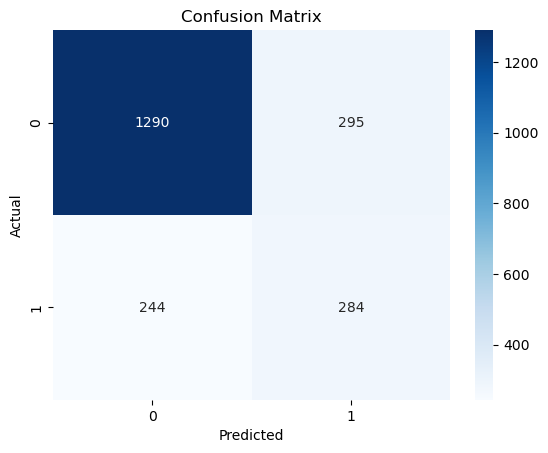

In [51]:
# create the confusion Matrix

lc1=confusion_matrix(y_test, Dty_pred)


#Visualize the confusion_marix

sns.heatmap(lc1, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

#### Observations
- True Positives (TP): You have 284 true positives, which means that the model correctly predicted 284 instances as positive.
- False Positives (FP): There are 295 false positives, indicating that the model incorrectly predicted 295 instances as positive when they were actually negative.
- False Negatives (FN): There are 244 false negatives, indicating that the model incorrectly predicted 244 instances as negative when they were actually positive.
- True Negatives (TN): You have 1290 true negatives, which means that the model correctly predicted 1290 instances as negative.


In [52]:
#Calculate mean squared error
mse = np.logical_xor(y_test, Dty_pred).mean()

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = np.logical_xor(y_test, Dty_pred).sum() / len(y_test)

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.25508755324183624
MSE: 0.25508755324183624
RMSE: 0.5050619301054439


### SGD Classifier Model

In [53]:
#Create an instance of the SGDClassifier
sgd_classifier = SGDClassifier()

# Fit the classifier to your training data
sgd_classifier.fit(x_train, y_train)



SGDClassifier()

In [54]:
# Make predictions on new data
sgd_pred = sgd_classifier.predict(x_test)
print("SGD Classifier")
print ("Accuracy:", accuracy_score(y_test, sgd_pred))
print ("Precision:", precision_score(y_test, sgd_pred))
print("Recall:", recall_score(y_test, sgd_pred))
print("F1-score:", f1_score(y_test, sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

SGD Classifier
Accuracy: 0.8121154756270705
Precision: 0.6641604010025063
Recall: 0.5018939393939394
F1-score: 0.5717367853290185
AUC-ROC: 0.7086756763215755


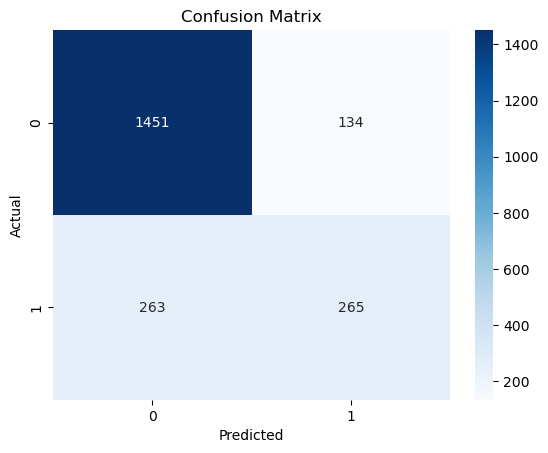

In [55]:
# create the confusion Matrix

lc2=confusion_matrix(y_test, sgd_pred)


#Visualize the confusion_marix

sns.heatmap(lc2, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

#### Observations
- True Positives (TP): You have 265 true positives, which means that the model correctly predicted 265 instances as positive.
- False Positives (FP): There are 134 false positives, indicating that the model incorrectly predicted 134 instances as positive when they were actually negative.
- False Negatives (FN): There are 263 false negatives, indicating that the model incorrectly predicted 263 instances as negative when they were actually positive.
- True Negatives (TN): You have 1451 true negatives, which means that the model correctly predicted 1451 instances as negative.

In [56]:
#Calculate mean squared error
mse = np.logical_xor(y_test, sgd_pred).mean()

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = np.logical_xor(y_test, sgd_pred).sum() / len(y_test)

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2: 0.1878845243729295
MSE: 0.1878845243729295
RMSE: 0.4334564849819754


### From the four Evaluation Models above Logistic Regression Model has better Metric results . This is because the goal  is to predict customer churn. In that case, it is best to prioritize the model with higher recall, F1 score, and AUC-ROC. These metrics are particularly important for identifying customers who have churned accurately. These metrics help to identify customers who have churned accurately and minimize false negatives.



### The Business should be more concerned with the False Negative(FN) Results, because it wrongly predicts that the customers have not churned whereas they have churned, thereby reducing the ability of Customer Retention